In [1]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:

def roundTime(dt=None):    
    dt = dt.to_pydatetime()
    roundTo = 15*60    
    if dt == None : dt = datetime.datetime.now()
    seconds = (dt.replace(tzinfo=None) - dt.min).seconds
    rounding = (seconds+roundTo/2) // roundTo * roundTo
    return dt + datetime.timedelta(0,rounding-seconds,-dt.microsecond)


def conv_entries(arr):  
    int_arr = [int(x) for x in arr]
    if int_arr[2] > 29:
        int_arr[1] += 1        
    int_arr[2] = 0
    mins = int_arr[0]*60 + int_arr[1]
    rem = mins % 15
    if rem > 7:
        mins += (15-rem)
    else:
        mins -= rem         
    return mins

def calc_quarter_load(row):
    dur = row['Charging_Time__hh_mm_ss_']
    total = row['Energy__kWh_']
    return (total/dur)*15.0


def add_to_backbone(row):
    iters = row['Charging_Time__hh_mm_ss_']//15
    for i in range(iters):
        backbone.loc[backbone['date_time'] == row['Start_Date___Time'] + datetime.timedelta(minutes=15*i), 'value'] += row['Load_per_quarter'] 
        backbone.loc[backbone['date_time'] == row['Start_Date___Time'] + datetime.timedelta(minutes=15*i), 'sessions'] += 1    

   

In [3]:
df_boulder = pd.read_csv (r'/home/doktormatte/Dropbox/Dokumente/Studium/MA_SciComp/Data/Electric_Vehicle_Charging_Station_Energy_Consumption_Boulder.csv')  


In [4]:
exclude_stations_boulder = ["BOULDER / EAST REC","BOULDERJUNCTION / JUNCTION ST1","BOULDER / RESERVOIR ST1","BOULDER / RESERVOIR ST2","BOULDER / CARPENTER PARK1","BOULDER / CARPENTER PARK2","BOULDER / AIRPORT ST1","COMM VITALITY / 5050 PEARL 1","BOULDER / VALMONT ST2","BOULDER / VALMONT ST1"]
df_boulder = df_boulder[df_boulder.Station_Name.isin(exclude_stations_boulder) == False]

In [5]:
df_boulder = df_boulder[df_boulder['Start_Date___Time'].notna()]
df_boulder = df_boulder[df_boulder['End_Date___Time'].notna()]

In [6]:

cutoff = datetime.datetime.strptime("2019/01/01 00:00:00+00", '%Y/%m/%d %H:%M:%S+%f')
#cutoff = datetime.datetime.strptime("2020/03/15 00:00:00+00", '%Y/%m/%d %H:%M:%S+%f')

df_boulder.Start_Date___Time = df_boulder.Start_Date___Time.map(lambda x: datetime.datetime.strptime(x, '%Y/%m/%d %H:%M:%S+%f'))
df_boulder.End_Date___Time = df_boulder.End_Date___Time.map(lambda x: datetime.datetime.strptime(x, '%Y/%m/%d %H:%M:%S+%f'))
df_boulder = df_boulder[df_boulder.Start_Date___Time >= cutoff]
df_boulder = df_boulder[df_boulder.Energy__kWh_ > 0.0]

In [7]:
df_boulder.Charging_Time__hh_mm_ss_ = df_boulder.Charging_Time__hh_mm_ss_.map(lambda x: x.split(':'))
df_boulder.Charging_Time__hh_mm_ss_ = df_boulder.Charging_Time__hh_mm_ss_.map(conv_entries)
df_boulder = df_boulder[df_boulder.Charging_Time__hh_mm_ss_ > 0]

df_boulder.Total_Duration__hh_mm_ss_ = df_boulder.Total_Duration__hh_mm_ss_.map(lambda x: x.split(':'))
df_boulder.Total_Duration__hh_mm_ss_ = df_boulder.Total_Duration__hh_mm_ss_.map(conv_entries)
df_boulder = df_boulder[df_boulder.Total_Duration__hh_mm_ss_ > 0]


# times = df_boulder['Charging_Time__hh_mm_ss_']
# print(len(times))
# print(len(times[times.duplicated(keep=False)]))


In [8]:
df_boulder['Load_per_quarter'] = df_boulder.apply(lambda row: calc_quarter_load(row), axis=1)

df_boulder.Start_Date___Time = df_boulder.Start_Date___Time.dt.to_pydatetime()
df_boulder.Start_Date___Time = df_boulder.Start_Date___Time.map(roundTime)
start = cutoff
# start = datetime.datetime.strptime("2020/03/15 00:00:00+00", '%Y/%m/%d %H:%M:%S+%f')
end = datetime.datetime.strptime("2020/03/15 00:00:00+00", '%Y/%m/%d %H:%M:%S+%f')
# end = max(df_boulder.End_Date___Time)

In [9]:
backbone = pd.DataFrame({'date_time': pd.date_range(start, end, freq="15min")})
backbone.set_index('date_time')
backbone['value'] = 0.0
backbone['sessions'] = 0

In [10]:
print(len(df_boulder))
from scipy import stats
df_boulder['z_score'] = np.abs(stats.zscore(df_boulder.Charging_Time__hh_mm_ss_))
df_boulder = df_boulder[df_boulder.z_score <= 3.0]
print(len(df_boulder))

21717
21284


In [11]:

# df_boulder.Charging_Time__hh_mm_ss_


# def calc_power(row):
#     dur = row.Charging_Time__hh_mm_ss_
#     energy = row.Energy__kWh_
#     return round((energy/dur)*60)
    
# df_boulder['power'] = df_boulder.apply(lambda row: calc_power(row), axis=1)


# list(df_boulder)
# np.mean(df_boulder.power)

# vc_power = df_boulder.power.value_counts()
# vc_power = vc_power.sort_index()
# x_power = vc_power.index
# y_power = vc_power.values
# plt.rcParams["figure.figsize"] = (20,10)
# plt.bar(x_power, y_power, width=0.9)
# plt.show()



In [14]:
list(df_boulder)
stattions = set(list(df_boulder.Station_Name))

stat_backbones = dict.fromkeys(stations)
stat_weekday_averages = dict.fromkeys(stations)
stat_weekend_averages = dict.fromkeys(stations)


for stat_name in stat_names:
    

{'BOULDER / ALPINE ST1',
 'BOULDER / ANNEX ST1',
 'BOULDER / ATRIUM ST1',
 'BOULDER / BASELINE ST1',
 'BOULDER / BOULDER PARK S1',
 'BOULDER / BOULDER PARK S2',
 'BOULDER / FACILITIES ST1',
 'BOULDER / JUNCTION ST1',
 'BOULDER / N BOULDER REC 1',
 'BOULDER / REC CENTER ST1',
 'BOULDER / REC CENTER ST2',
 'COMM VITALITY / 1000WALNUT1',
 'COMM VITALITY / 1000WALNUT2',
 'COMM VITALITY / 1100WALNUT1',
 'COMM VITALITY / 1104 SPRUCE1',
 'COMM VITALITY / 1400 WALNUT1',
 'COMM VITALITY / 1500PEARL1',
 'COMM VITALITY / 1500PEARL2',
 'COMM VITALITY / 2200 BROADWAY1',
 'COMM VITALITY / BOULDER JCTN'}

In [82]:
df_boulder.apply(lambda row: add_to_backbone(row), axis=1)



KeyboardInterrupt: 

In [ ]:
df_boulder['Energy__Wh_'] = df_boulder.Energy__kWh_.apply(lambda x: round(int(x*1000)/100)*100)
vc_energy = df_boulder.Energy__Wh_.value_counts()
vc_energy = vc_energy.sort_index()

x_energy = vc_energy.index
y_energy = vc_energy.values
plt.rcParams["figure.figsize"] = (20,10)
plt.bar(x_energy, y_energy, width=100)
plt.xlabel("Wh")
plt.ylabel("count")
plt.title("energy consumed")
plt.savefig('/home/doktormatte/Dropbox/Dokumente/Studium/MA_SciComp/Data/Plots/Pre_covid/boulder_energy.png')
plt.show()

In [ ]:

def get_hs_and_mins(ts):
    hours = str(ts.hour)
    minutes = str(ts.minute)
    if hours == '0':
        hours = '00'
    if minutes == '0':
        minutes = '00'        
    ts = datetime.datetime.strptime(hours + ":" + minutes, '%H:%M')    
    return ts
    
df_boulder['plugin_time'] = df_boulder.Start_Date___Time.map(get_hs_and_mins)
vc_plugin = df_boulder.plugin_time.value_counts()
vc_plugin = vc_plugin.sort_index()


x_plugin = vc_plugin.index
x_plugin = range(94)
y_plugin = vc_plugin.values
plt.rcParams["figure.figsize"] = (20,10)
plt.bar(x_plugin, y_plugin, width=0.9)
plt.xlabel("timeslot")
plt.ylabel("count")
plt.title("plugin time")
plt.savefig('/home/doktormatte/Dropbox/Dokumente/Studium/MA_SciComp/Data/Plots/Pre_covid/boulder_plugin_time.png')
plt.show()

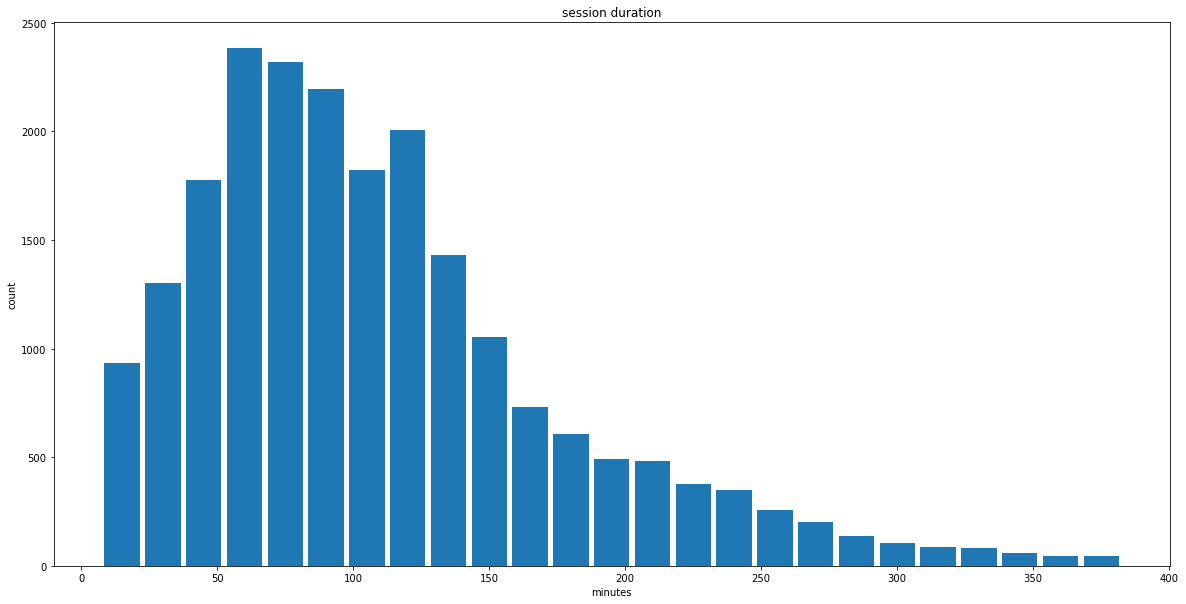

In [47]:
vc_duration = df_boulder.Charging_Time__hh_mm_ss_.value_counts()
vc_duration = vc_duration.sort_index()
x_duration = vc_duration.index
y_duration = vc_duration.values

plt.rcParams["figure.figsize"] = (20,10)
plt.bar(x_duration, y_duration,width=13)

plt.xlabel("minutes")
plt.ylabel("count")
plt.title("session duration")
plt.savefig('/home/doktormatte/Dropbox/Dokumente/Studium/MA_SciComp/Data/Plots/Pre_covid/boulder_session_duration.png')
plt.show()


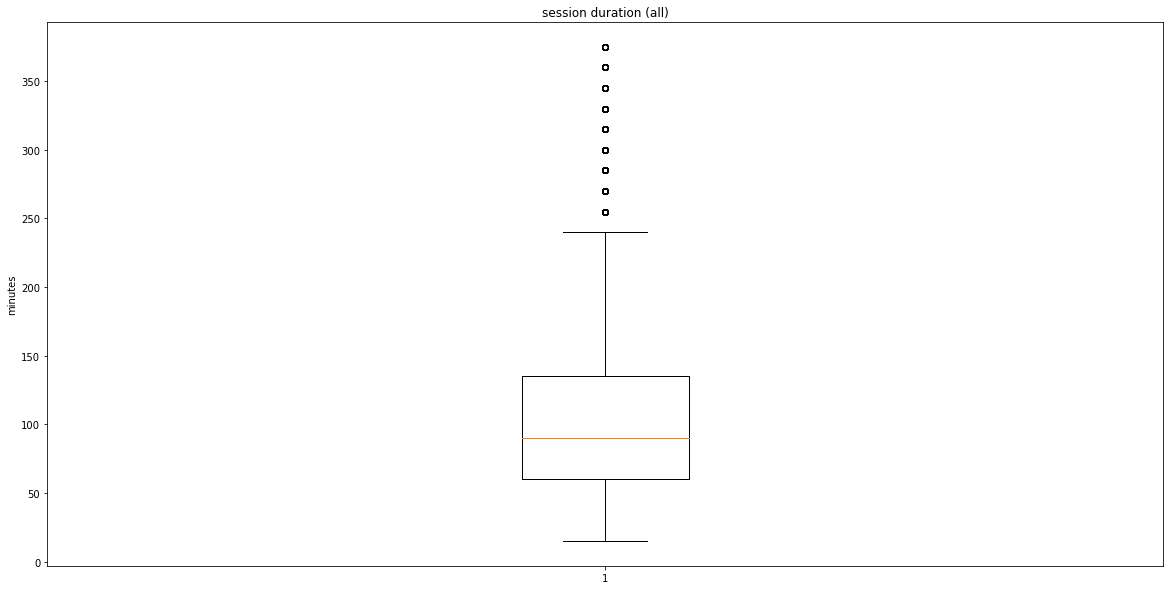

In [48]:



plt.boxplot(df_boulder.Charging_Time__hh_mm_ss_)
#plt.rcParams["figure.figsize"] = (10,5)
plt.ylabel("minutes")
plt.title("session duration (all)") 
plt.savefig('/home/doktormatte/Dropbox/Dokumente/Studium/MA_SciComp/Data/Plots/Pre_covid/boulder_box_all.png')
plt.show()

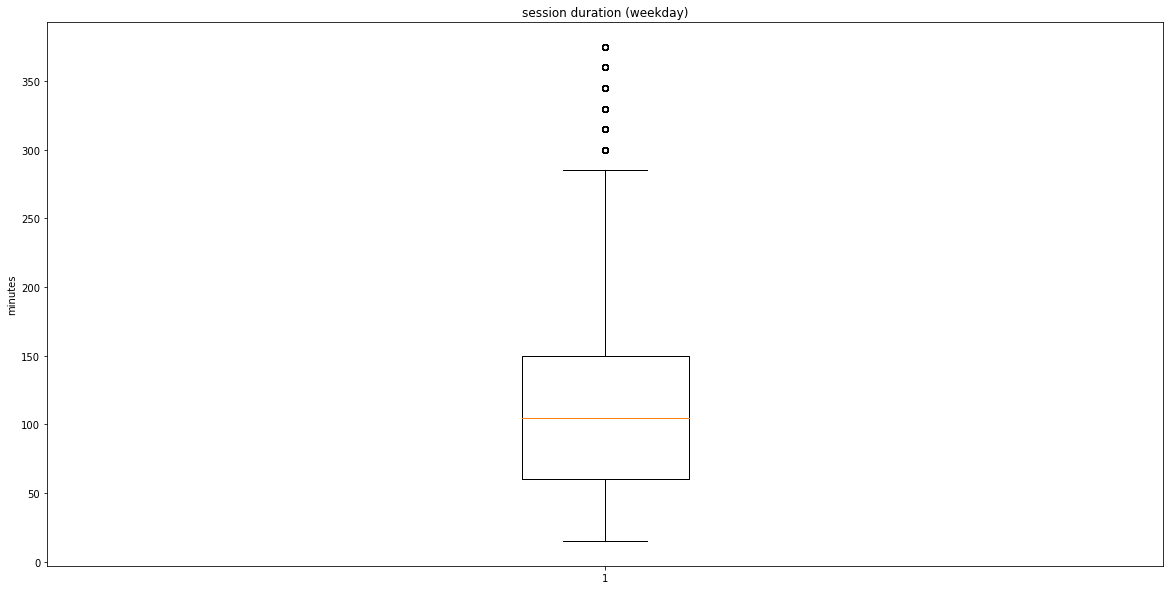

In [49]:
def get_weekend(ts):
    if ts.weekday() > 4:
        return 1
    return 0


df_boulder['weekend'] = df_boulder.Start_Date___Time.apply(get_weekend)

df_boulder_weekday = df_boulder[df_boulder['weekend'] == 0]
df_boulder_weekend = df_boulder[df_boulder['weekend'] == 1]


plt.boxplot(df_boulder_weekday.Charging_Time__hh_mm_ss_)
#plt.rcParams["figure.figsize"] = (10,5)
plt.ylabel("minutes")
plt.title("session duration (weekday)") 
plt.savefig('/home/doktormatte/Dropbox/Dokumente/Studium/MA_SciComp/Data/Plots/Pre_covid/boulder_box_weekday.png')
plt.show()


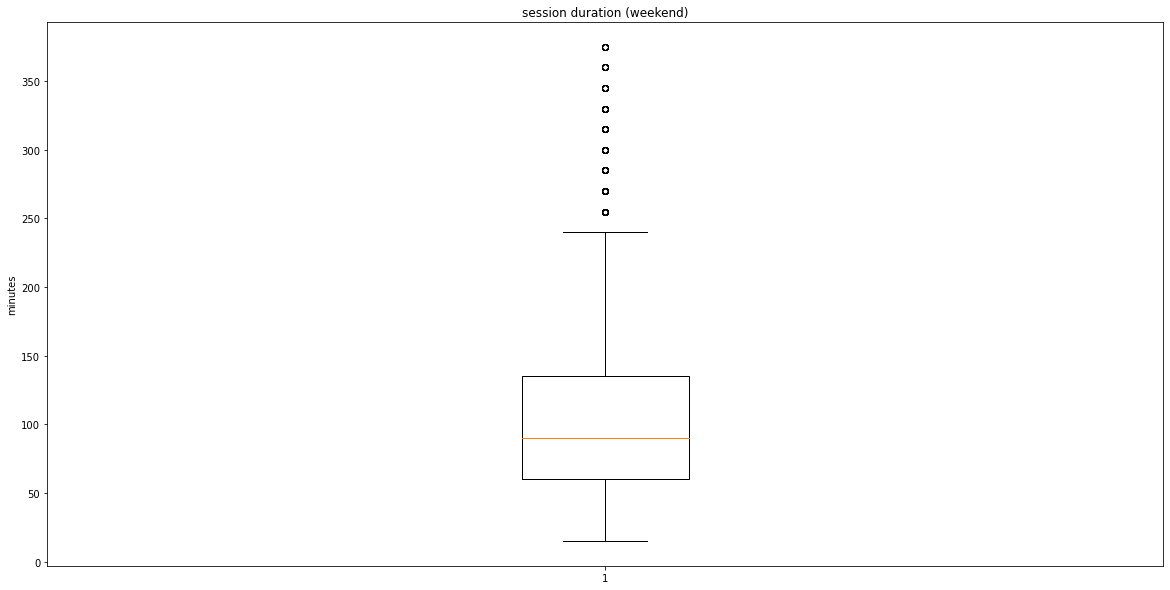

In [69]:
plt.boxplot(df_boulder_weekend.Charging_Time__hh_mm_ss_)
#plt.rcParams["figure.figsize"] = (10,5)
plt.ylabel("minutes")
plt.title("session duration (weekend)") 
plt.savefig('/home/doktormatte/Dropbox/Dokumente/Studium/MA_SciComp/Data/Plots/Pre_covid/boulder_box_weekend.png')
plt.show()

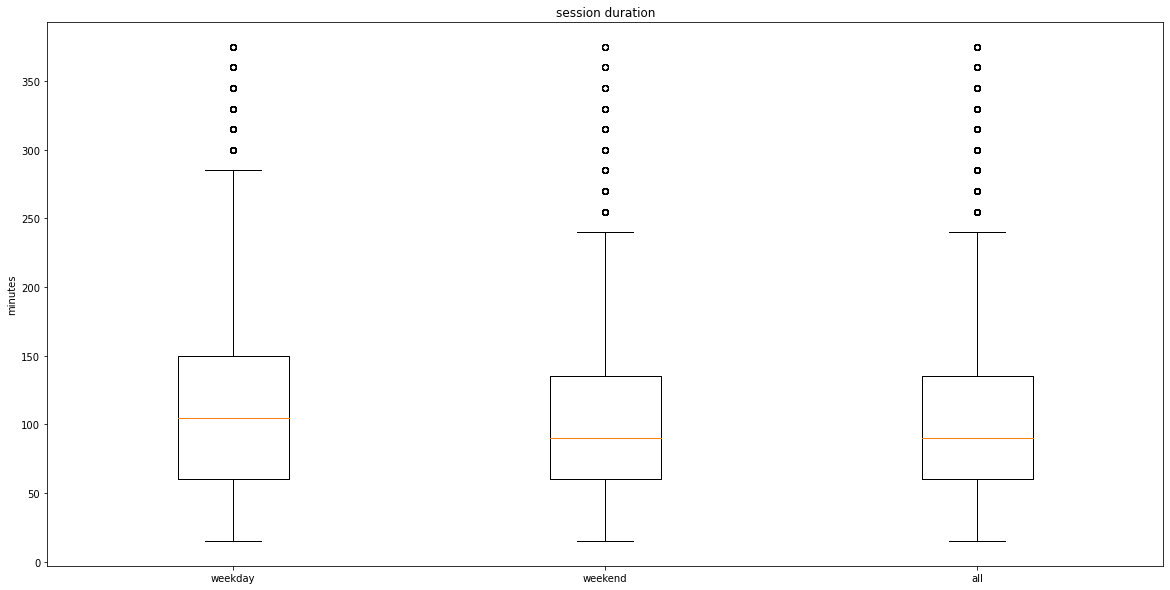

In [71]:
value_dict = {'weekday': df_boulder_weekday.Charging_Time__hh_mm_ss_, 'weekend': df_boulder_weekend.Charging_Time__hh_mm_ss_, 'all': df_boulder.Charging_Time__hh_mm_ss_}

fig, ax = plt.subplots()
ax.boxplot(value_dict.values())
ax.set_xticklabels(value_dict.keys())
plt.rcParams["figure.figsize"] = (20,10)
plt.ylabel("minutes")
plt.title("session duration") 
plt.savefig('/home/doktormatte/Dropbox/Dokumente/Studium/MA_SciComp/Data/Plots/Pre_covid/boulder_boxes.png')
plt.show()

In [51]:
backbone_daily = pd.DataFrame({'date_time': pd.date_range(start, end, freq="24h")})
backbone_daily.set_index('date_time')
backbone_daily['value'] = 0.0
backbone_daily['sessions'] = 0
backbone_daily = backbone_daily[:-1]
# print(backbone_daily)
# print(backbone)

# print(backbone[backbone['date_time'] == '2019-01-01 10:30:00']['value'].item())


def get_daily_values(row):    
    avg = 0.0
    start_time = row['date_time']
    for i in range(96):
        avg += backbone[backbone['date_time'] == start_time + datetime.timedelta(minutes=15*i)]['value'].item()    
    avg /= 96.0    
    # backbone_daily.loc[row.Index, 'value'] = avg
    backbone_daily.at[row.Index, 'value'] = avg
    
    
for row in backbone_daily.itertuples():
    avg_load = 0.0
    avg_sessions = 0
    start_time = backbone_daily.at[row.Index, 'date_time']
    for i in range(96):
        avg_load += backbone[backbone['date_time'] == start_time + datetime.timedelta(minutes=15*i)]['value'].item()    
        avg_sessions += backbone[backbone['date_time'] == start_time + datetime.timedelta(minutes=15*i)]['sessions'].item()
    avg_load /= 96.0    
    backbone_daily.loc[row.Index, 'value'] = avg_load  
    backbone_daily.loc[row.Index, 'sessions'] = avg_sessions  
    


#backbone_daily.apply(lambda row: get_daily_values(row), axis=1)
print(backbone_daily)

     date_time     value  sessions
0   2019-01-01  0.964729        76
1   2019-01-02  1.354167       119
2   2019-01-03  2.201844       173
3   2019-01-04  1.901625       178
4   2019-01-05  0.952073        77
..         ...       ...       ...
434 2020-03-10  1.829958       150
435 2020-03-11  1.502083       119
436 2020-03-12  1.663979       135
437 2020-03-13  1.133229        91
438 2020-03-14  0.602573        43

[439 rows x 3 columns]


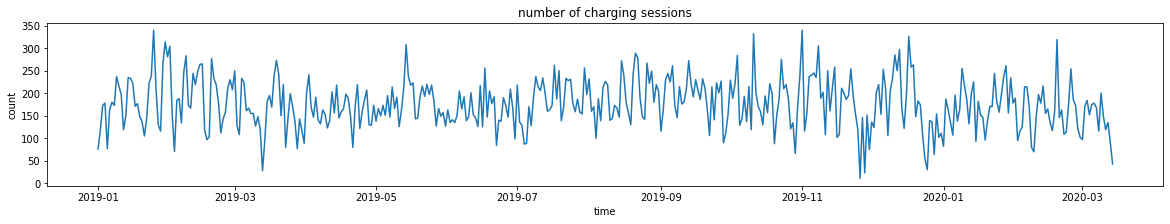

In [52]:
max(backbone_daily['sessions'])

x_sessions = backbone_daily['date_time']
y_sessions = backbone_daily['sessions']
plt.rcParams["figure.figsize"] = (20,3)

plt.plot(x_sessions, y_sessions)
plt.xlabel("time")
plt.ylabel("count")
plt.title("number of charging sessions")
plt.show()

In [53]:
aggr_load_values = backbone['value']
print(len(aggr_load_values))
print(len(aggr_load_values[aggr_load_values.duplicated(keep=False)]))

42145
34732


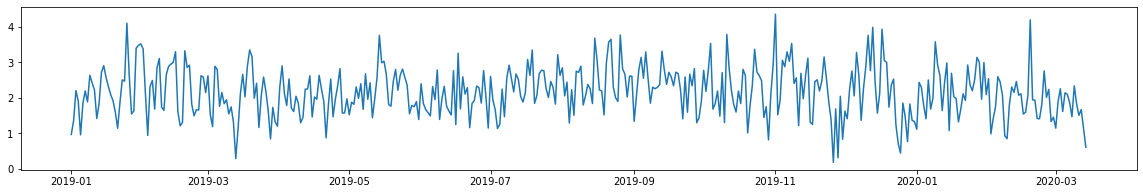

In [54]:

x = backbone_daily['date_time'][:100]
y = backbone_daily['value'][:100]  


x = backbone_daily['date_time']
y = backbone_daily['value']  



plt.rcParams["figure.figsize"] = (20,3)
plt.plot(x, y)
plt.show()

In [55]:
import math
import time

In [56]:
from numpy import array
from matplotlib import pyplot
from tensorflow import keras 

In [57]:
from keras.models import Sequential 
from keras.layers import LSTM 
from keras.layers import Dense,Dropout  
from keras.models import Model 
from keras.layers import Input
from tensorflow.keras.layers import concatenate

In [58]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

In [59]:
quarter_index = backbone.date_time[0].hour*4 + backbone.date_time[0].minute//15

In [60]:
def sin_cos_encode_quarterhour(date_time):
    quarter_index = date_time.hour*4 + date_time.minute//15
    sin = np.sin(2.0*np.pi*quarter_index/96.0)
    cos = np.cos(2.0*np.pi*quarter_index/96.0)
    return [sin, cos]

In [61]:
def sin_cos_encode_day(date_time):
    day_index = date_time.weekday()
    #print(day_index)
    sin = np.sin(2.0*np.pi*day_index/7.0)
    cos = np.cos(2.0*np.pi*day_index/7.0)
    return [sin, cos]

def weekend_enc(date_time):
    day_index = date_time.weekday()
    if day_index > 4:
        return [1.0]
    return [0.0]
    

In [62]:
backbone['quarter_enc'] = backbone.date_time.map(sin_cos_encode_quarterhour)


In [63]:
backbone['day_enc'] = backbone.date_time.map(sin_cos_encode_day)

In [64]:
backbone['weekend_enc'] = backbone.date_time.map(weekend_enc)

In [65]:
backbone.shape


(42145, 6)

In [66]:
backbone


,date_time,value,sessions,quarter_enc,day_enc,weekend_enc
0,2019-01-01 00:00:00,0.0,0,"[0.0, 1.0]","[0.7818314824680298, 0.6234898018587336]",[0.0]
1,2019-01-01 00:15:00,0.0,0,"[0.06540312923014306, 0.9978589232386035]","[0.7818314824680298, 0.6234898018587336]",[0.0]
2,2019-01-01 00:30:00,0.0,0,"[0.13052619222005157, 0.9914448613738104]","[0.7818314824680298, 0.6234898018587336]",[0.0]
3,2019-01-01 00:45:00,0.0,0,"[0.19509032201612825, 0.9807852804032304]","[0.7818314824680298, 0.6234898018587336]",[0.0]
4,2019-01-01 01:00:00,0.0,0,"[0.25881904510252074, 0.9659258262890683]","[0.7818314824680298, 0.6234898018587336]",[0.0]
...,...,...,...,...,...,...
42140,2020-03-14 23:00:00,0.0,0,"[-0.25881904510252157, 0.9659258262890681]","[-0.9749279121818236, -0.2225209339563146]",[1.0]
42141,2020-03-14 23:15:00,0.0,0,"[-0.19509032201612872, 0.9807852804032303]","[-0.9749279121818236, -0.2225209339563146]",[1.0]
42142,2020-03-14 23:30:00,0.0,0,"[-0.13052619222005168, 0.9914448613738104]","[-0.9749279121818236, -0.2225209339563146]",[1.0]
42143,2020-03-14 23:45:00,0.0,0,"[-0.0654031292301428, 0.9978589232386035]","[-0.9749279121818236, -0.2225209339563146]",[1.0]
